In [270]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import scipy.stats as stat
import matplotlib as mt
from matplotlib import pyplot as plt
os.getcwd()

'/Users/abhishek/Desktop/Python Data/5. Pandas Case Study 3 - Insurance Claims Case Study'

#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [93]:
claim = pd.read_csv('/Users/abhishek/Desktop/Python Data/5. Pandas Case Study 3 - Insurance Claims Case Study/claims copy.csv')
claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/18,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/18,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/17,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/18,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [94]:
Cust_demo = pd.read_csv('/Users/abhishek/Desktop/Python Data/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics copy.csv')
Cust_demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [95]:
Cust_Final = pd.merge(left=claim,right=Cust_demo,left_on="customer_id",right_on="CUST_ID",how = "inner")

In [96]:
Cust_Final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/18,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/18,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/18,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


#### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

  - claim_date should be in datetime format
  - clam_amount should be float
  - total_policy_claim should be int not float
  - frauulent should be boolean
  - DateOfBirth should be datetime
  - Contact should be int

In [97]:
Dtype = Cust_Final.dtypes
Dtype

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [98]:
Cust_Final.claim_date = pd.to_datetime(Cust_Final.claim_date).dt.normalize()
Claim_Date = Cust_Final.claim_date
Claim_Date

0      2017-11-27
1      2018-10-03
2      2018-02-02
3      2018-04-04
4      2018-06-17
          ...    
1080   2018-09-06
1081   2017-05-09
1082   2017-05-15
1083   2017-04-18
1084   2017-03-16
Name: claim_date, Length: 1085, dtype: datetime64[ns]

In [156]:
#today = pd.datetime.today()
Cust_Final.DateOfBirth.dt.year

0       1979
1       1970
2       1984
3       1986
4       1977
        ... 
1073    1981
1074    1996
1075    1990
1076    2064
1077    1995
Name: DateOfBirth, Length: 1078, dtype: int64

In [154]:
today = pd.to_datetime(today)
today.year

2020

In [161]:
Cust_Final.DateOfBirth = pd.to_datetime(Cust_Final.DateOfBirth).dt.normalize()
DateOfBirth = Cust_Final.DateOfBirth
DateOfBirth = pd.Series(np.where(Cust_Final.DateOfBirth.dt.year>today.year,Cust_Final.DateOfBirth-pd.DateOffset(years = 100),Cust_Final.DateOfBirth))
DateOfBirth

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1986-05-01
4      1977-05-13
          ...    
1073   1981-03-15
1074   1996-07-07
1075   1990-04-11
1076   1964-10-22
1077   1995-07-12
Length: 1078, dtype: datetime64[ns]

In [162]:
Cust_Final['DateOfBirth'] = DateOfBirth

In [100]:
Cust_Final.Contact= Cust_Final.Contact.str.replace("-","")
Cust_Final.Contact = Cust_Final.Contact.astype(int)

In [101]:
Cust_Final.Contact

0       7899168172
1       2655431264
2       7986314758
3       7986314758
4       4131877945
           ...    
1080    4594254319
1081    5294621635
1082    7126519613
1083    4693455617
1084    1823851392
Name: Contact, Length: 1085, dtype: int64

#### 3.Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [102]:
Cust_Final.claim_amount = Cust_Final.claim_amount.str.replace("$","")
Cust_Final.claim_amount = pd.to_numeric(Cust_Final.claim_amount)

In [103]:
Cust_Final.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                         int64
Segment                        object
dtype: object

#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [104]:
Cust_Final = Cust_Final.assign(Alert_Flag = np.where((Cust_Final.police_report=="No")|(Cust_Final.police_report=="Unknown"),0,1))

In [105]:
Cust_Final.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7899168172,Platinum,0


#### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [106]:
Duplicate = Cust_Final.loc[Cust_Final.customer_id.duplicated(keep="last")]
Duplicate.index

Int64Index([2, 4, 6, 8, 607, 609, 611], dtype='int64')

In [107]:
Cust_Final = Cust_Final.drop(Duplicate.index)

In [22]:
#Cust_Final.loc[Cust_Final.customer_id.duplicated(keep="first")]

In [108]:
Cust_Final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7899168172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,2655431264,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,7986314758,Silver,0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,4131877945,Silver,0
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,9568718691,Gold,0


In [109]:
Cust_Final = Cust_Final.reset_index(drop=True)

In [110]:
Cust_Final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7899168172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,2655431264,Silver,0
2,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,7986314758,Silver,0
3,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,4131877945,Silver,0
4,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,9568718691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,4594254319,Platinum,1
1074,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,5294621635,Silver,0
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,7126519613,Gold,1
1076,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,2064-10-22,LA,4693455617,Silver,0


#### 6.Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

 - Claim amount & Total Poicy Claim were having missing values in the entire data set
 - Categorical variables didn't have any missing values

In [111]:
Cust_Final.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                         int64
Segment                        object
Alert_Flag                      int64
dtype: object

In [112]:
Continous_Var = [key for key in dict(Cust_Final.dtypes)if dict(Cust_Final.dtypes)[key]in["float64","int64"]]

In [113]:
Continous_Var = Cust_Final[Continous_Var]

In [114]:
Continous_Var

,claim_id,customer_id,claim_amount,total_policy_claims,CUST_ID,Contact,Alert_Flag
0,54004764,21868593,2980.0,1.0,21868593,7899168172,0
1,33985796,75740424,2980.0,3.0,75740424,2655431264,0
2,63017412,30308357,1950.0,6.0,30308357,7986314758,0
3,91609100,47830476,1440.0,1.0,47830476,4131877945,0
4,39219616,19269962,2240.0,2.0,19269962,9568718691,0
...,...,...,...,...,...,...,...
1073,62020796,79539873,1770.0,1.0,79539873,4594254319,1
1074,63269067,42364152,2800.0,1.0,42364152,5294621635,0
1075,22690595,19888166,33080.0,2.0,19888166,7126519613,1
1076,12376894,11256802,2840.0,4.0,11256802,4693455617,0


In [115]:
Continous_Var.isnull().sum()

claim_id                0
customer_id             0
claim_amount           65
total_policy_claims    10
CUST_ID                 0
Contact                 0
Alert_Flag              0
dtype: int64

In [116]:
Cust_Final.claim_amount = Cust_Final.claim_amount.fillna(Cust_Final.claim_amount.mean())

In [118]:
#Cust_Final.loc[Cust_Final.claim_amount==12501.489634748272]

In [119]:
Cust_Final.total_policy_claims = Cust_Final.total_policy_claims.fillna(Cust_Final.total_policy_claims.mean())

In [124]:
Cust_Final.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims             int64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                         int64
Segment                        object
Alert_Flag                      int64
dtype: object

In [123]:
Cust_Final.total_policy_claims = Cust_Final.total_policy_claims.astype(int)

In [125]:
Categorical_var = [key for key in dict(Cust_Final.dtypes) if dict(Cust_Final.dtypes)[key]in["object"]]

In [126]:
Categorical_var = Cust_Final[Categorical_var]

In [127]:
Categorical_var.isnull().sum()

incident_cause    0
claim_area        0
police_report     0
claim_type        0
fraudulent        0
gender            0
State             0
Segment           0
dtype: int64

In [128]:
Cust_Final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,21868593,Female,1979-01-12,VT,7899168172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,75740424,Female,1970-01-13,ME,2655431264,Silver,0
2,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,30308357,Female,1984-03-11,TN,7986314758,Silver,0
3,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,47830476,Female,1986-05-01,MA,4131877945,Silver,0
4,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,19269962,Male,1977-05-13,NV,9568718691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1,No,79539873,Female,1981-03-15,ND,4594254319,Platinum,1
1074,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1,No,42364152,Female,1996-07-07,ID,5294621635,Silver,0
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2,No,19888166,Male,1990-04-11,WI,7126519613,Gold,1
1076,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4,No,11256802,Female,2064-10-22,LA,4693455617,Silver,0


#### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
 - Children      < 18 
 - Youth         18-30 
 - Adult         30-60
 - Senior          60>


In [164]:
Cust_Final = Cust_Final.assign(Age = Cust_Final.claim_date.dt.year - Cust_Final.DateOfBirth.dt.year)

In [165]:
Cust_Final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,21868593,Female,1979-01-12,VT,7899168172,Platinum,0,38,Adults
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,75740424,Female,1970-01-13,ME,2655431264,Silver,0,48,Adults
2,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,30308357,Female,1984-03-11,TN,7986314758,Silver,0,34,Adults
3,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,47830476,Female,1986-05-01,MA,4131877945,Silver,0,31,Adults
4,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,19269962,Male,1977-05-13,NV,9568718691,Gold,0,41,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1,No,79539873,Female,1981-03-15,ND,4594254319,Platinum,1,37,Adults
1074,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1,No,42364152,Female,1996-07-07,ID,5294621635,Silver,0,21,Youth
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2,No,19888166,Male,1990-04-11,WI,7126519613,Gold,1,27,Youth
1076,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4,No,11256802,Female,1964-10-22,LA,4693455617,Silver,0,53,Children


In [283]:
Cust_Final = Cust_Final.assign(Age_Category = np.where(Cust_Final.Age < 18,"Children",(np.where((Cust_Final.Age >= 18)&(Cust_Final.Age<=30),"Youth",(np.where((Cust_Final.Age >30)&(Cust_Final.Age <=60),"Adults","Senior"))))))

In [284]:
Cust_Final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Category,Claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,21868593,Female,1979-01-12,VT,7899168172,Platinum,0,38,Adults,Nov
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,75740424,Female,1970-01-13,ME,2655431264,Silver,0,48,Adults,Oct
2,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,30308357,Female,1984-03-11,TN,7986314758,Silver,0,34,Adults,Apr
3,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,47830476,Female,1986-05-01,MA,4131877945,Silver,0,31,Adults,Apr
4,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,19269962,Male,1977-05-13,NV,9568718691,Gold,0,41,Adults,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1,No,79539873,Female,1981-03-15,ND,4594254319,Platinum,1,37,Adults,Sep
1074,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1,No,42364152,Female,1996-07-07,ID,5294621635,Silver,0,21,Youth,May
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2,No,19888166,Male,1990-04-11,WI,7126519613,Gold,1,27,Youth,May
1076,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4,No,11256802,Female,1964-10-22,LA,4693455617,Silver,0,53,Adults,Apr


#### 8. What is the average amount claimed by the customers from various segments?

In [285]:
Avg_Amount_AgeWise = Cust_Final.groupby(by="Age_Category")[["claim_amount"]].mean()

In [286]:
Avg_Amount_AgeWise

,claim_amount
Age_Category,
Adults,12887.148923
Youth,11695.914790


#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [287]:
Current_Date = "2018-10-01"
Current_Date = pd.Series(Current_Date)
Current_Date = pd.to_datetime(Current_Date)
k = pd.DateOffset(n = 20)
Date_required = Current_Date - k
Date_required

0   2018-09-11
dtype: datetime64[ns]

In [288]:
Data_20days_Prior = Cust_Final.loc[Cust_Final.claim_date<="2018-09-11"]

In [289]:
Total_Amount_Claimed = Data_20days_Prior.groupby(by="incident_cause")[["claim_amount"]].sum()

In [290]:
Total_Amount_Claimed

,claim_amount
incident_cause,
Crime,7.219374e+05
Driver error,3.315848e+06
Natural causes,1.312745e+06
Other causes,3.723147e+06
Other driver error,3.277533e+06


#### 10.How many adults from TX, DE and AK claimed insurance for driver related issues and causes?
 - 23 Adults from TX,DE & AK have clained insurance for driver related issues

In [291]:
Adults = Cust_Final.customer_id[((Cust_Final.incident_cause =="Driver error")|(Cust_Final.incident_cause =="Other driver error"))&((Cust_Final.State =="TX")|(Cust_Final.State =="DE")|(Cust_Final.State =="AK"))&(Cust_Final.Age_Category=="Adults")]
Adults.count()

23

In [193]:
#Cust_Final.to_excel(r'/Users/abhishek/Desktop/Python Data/5. Pandas Case Study 3 - Insurance Claims Case Study/Cust.xlsx')

#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [292]:
Pie_data = Cust_Final.groupby(by = ["gender","Segment"])[["claim_amount"]].mean()

In [293]:
Pie_data

claim_amount
gender Segment               
Female Gold      12339.429279
       Platinum  12278.344184
       Silver    11639.888744
Male   Gold      13279.834326
       Platinum  12478.829864
       Silver    12825.851609

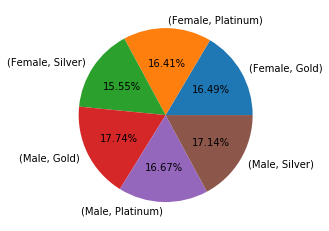

In [294]:
Pie_data.plot(kind = "pie",subplots = True,autopct = "%.2f%%",legend = False)
plt.ylabel("")
plt.show()

#### 12.Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart
 - Males have claimed more then the females in Driver Related issues

In [295]:
Cust_Final.incident_cause[-(Cust_Final.incident_cause.duplicated())]

0           Driver error
1                  Crime
3         Natural causes
4           Other causes
10    Other driver error
Name: incident_cause, dtype: object

In [296]:
Driver_Data = Cust_Final.loc[(Cust_Final.incident_cause =="Driver error")|(Cust_Final.incident_cause=="Other driver error")]

In [297]:
Driver_Data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Category,Claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,21868593,Female,1979-01-12,VT,7899168172,Platinum,0,38,Adults,Nov
2,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,30308357,Female,1984-03-11,TN,7986314758,Silver,0,34,Adults,Apr
5,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1,No,21831191,Male,1977-05-17,NH,4197128513,Gold,0,41,Adults,Feb
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4,No,18401412,Male,1999-03-02,AR,7523982914,Gold,0,19,Youth,Jan
10,74165873,99103685,Other driver error,2018-01-13,Home,No,Material only,1495.0,1,Yes,99103685,Female,1985-12-30,KY,7644399856,Gold,0,33,Adults,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,28084004,82089910,Driver error,2018-06-03,Auto,No,Material only,2780.0,1,No,82089910,Male,1973-10-09,FL,2572484825,Silver,0,45,Adults,Jun
1071,47457836,6756905,Driver error,2017-01-21,Auto,No,Material only,2320.0,3,No,6756905,Male,1997-10-21,NE,9244278125,Silver,0,20,Youth,Jan
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1,No,79539873,Female,1981-03-15,ND,4594254319,Platinum,1,37,Adults,Sep
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2,No,19888166,Male,1990-04-11,WI,7126519613,Gold,1,27,Youth,May


In [298]:
Claimed_More = Driver_Data.groupby(by=["gender"])[["claim_amount"]].sum()
Claimed_More

,claim_amount
gender,
Female,3.136715e+06
Male,3.975408e+06


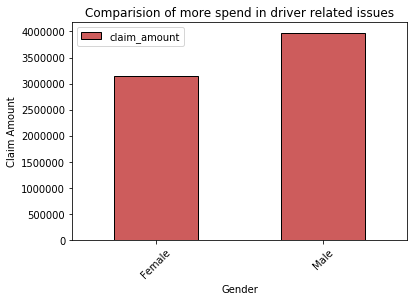

In [299]:
Claimed_More.plot(kind = "bar",edgecolor = "black",color = "indianred")
plt.xlabel("Gender")
plt.ylabel("Claim Amount")
plt.title("Comparision of more spend in driver related issues")
plt.xticks(rotation= 45)
plt.show()

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart
 - Audlt have the most fraud cases

In [300]:
Total_Fraud_Cases = Cust_Final.loc[Cust_Final.fraudulent=="Yes"]

In [301]:
Fraud_Claim = Total_Fraud_Cases.groupby(by=["Age_Category"])[["fraudulent"]].count()

In [302]:
Fraud_Claim

,fraudulent
Age_Category,
Adults,171
Youth,74


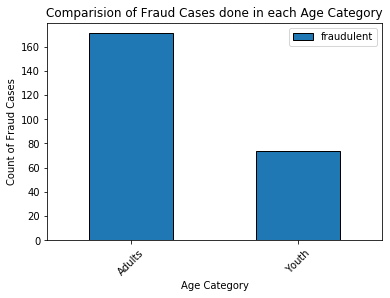

In [303]:
Fraud_Claim.plot(kind ="bar",edgecolor = "black")
plt.xlabel("Age Category")
plt.ylabel("Count of Fraud Cases")
plt.title("Comparision of Fraud Cases done in each Age Category")
plt.xticks(rotation = 45)
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [304]:
Cust_Final = Cust_Final.assign(Claim_month = Cust_Final.claim_date.dt.strftime('%b'))
Cust_Final

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Category,Claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,21868593,Female,1979-01-12,VT,7899168172,Platinum,0,38,Adults,Nov
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,75740424,Female,1970-01-13,ME,2655431264,Silver,0,48,Adults,Oct
2,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,30308357,Female,1984-03-11,TN,7986314758,Silver,0,34,Adults,Apr
3,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,47830476,Female,1986-05-01,MA,4131877945,Silver,0,31,Adults,Apr
4,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,19269962,Male,1977-05-13,NV,9568718691,Gold,0,41,Adults,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1,No,79539873,Female,1981-03-15,ND,4594254319,Platinum,1,37,Adults,Sep
1074,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1,No,42364152,Female,1996-07-07,ID,5294621635,Silver,0,21,Youth,May
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2,No,19888166,Male,1990-04-11,WI,7126519613,Gold,1,27,Youth,May
1076,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4,No,11256802,Female,1964-10-22,LA,4693455617,Silver,0,53,Adults,Apr


In [305]:
Monthly_Claim = Cust_Final.groupby(by="Claim_month")[["claim_amount"]].sum()

In [306]:
Monthly_Claim

,claim_amount
Claim_month,
Apr,1.293953e+06
Aug,9.112965e+05
Dec,6.942525e+05
Feb,1.164541e+06
Jan,1.327169e+06
Jul,1.379314e+06
Jun,1.277349e+06
Mar,1.320249e+06
May,1.114459e+06


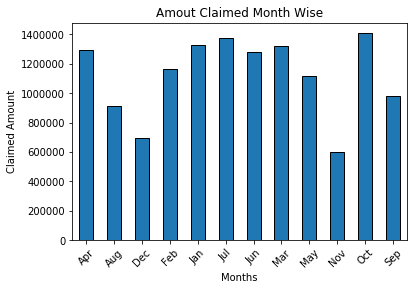

In [307]:
Monthly_Claim.plot(kind = "bar", edgecolor ="black",legend = False)
plt.xlabel("Months")
plt.ylabel("Claimed Amount")
plt.title("Amout Claimed Month Wise")
plt.xticks(rotation = 45)
plt.show()

#### 15.What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [308]:
GG = Cust_Final.groupby(by=["gender","Age_Category","fraudulent"])[["claim_amount"]].mean().add_prefix("AverageOf")

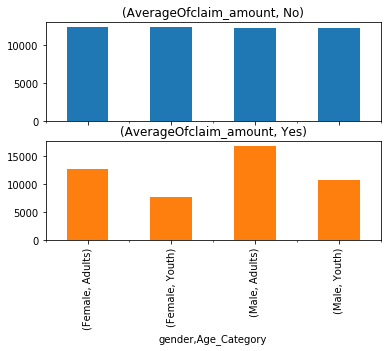

In [309]:
GG.unstack(2).plot(kind="bar",subplots=True,legend = False)
plt.show()

#### 16. Is there any similarity in the amount claimed by males and females?
 - Variabales taken in this test is Gender and Claim Amount
 - In this we need to test the mean of amount calim by male is equal to mean of amount claim      by female
 - H0 : Mean of Amount Claimed by Male == Mean of Amount Claimed by Female
 - H1 : Mean of Amount Claimed by Male <> Mean of Amount Claimed by Female
 - Assuming alpha = 0.05
 - We will do the independent sample t-test in two steps
  - Step 1: Putting Equal Variance = false
  - Step 2: Putting Equal Variance = True
 - In the final stage we will compare the T-Score value of equal and unequal variance, if both    are nearly equal then we will choose the equal variance, t-score & p-value accordinly

In [310]:
Amount_male = Cust_Final.claim_amount[Cust_Final.gender=="Male"]
Amount_female = Cust_Final.claim_amount[Cust_Final.gender=="Female"]

In [311]:
Amount_male.head()

4     2240.0
5    36810.0
6     1730.0
7     1160.0
8     2620.0
Name: claim_amount, dtype: float64

In [312]:
Amount_female.head()

0    2980.0
1    2980.0
2    1950.0
3    1440.0
9    2748.5
Name: claim_amount, dtype: float64

In [313]:
stat.ttest_ind(a=Amount_male,b=Amount_female,equal_var = False)

Ttest_indResult(statistic=0.9637241707490979, pvalue=0.33540080346197265)

In [314]:
stat.ttest_ind(a=Amount_male,b=Amount_female,equal_var = True)

Ttest_indResult(statistic=0.9630529881732577, pvalue=0.3357373087404285)

#### Since the T-score are nearly equal in both the cases, we will choose the P- Value where variance = True
 - pvalue = 0.335
 - aplha value = 0.05
 - We fail to reject the Null hypothesis
 - Male and female both have calimed the same amount
 - Meaning that bussiness is not affected by Gender

#### 17. Is there any relationship between age category and segment?
 - Variables taken in this test are Age Category and Segment
 - Age Categories are Youth, Adult
 - Segments are Gold, Platinum and Silver
 - We are trying to prove that there is a influence of any Age Categrory over Segments
 - Since both are categorical variable, we will go ahead with the Chi-Square test
 - H0 : Obsereved == Expected. i.e no influence of age category over segments
 - H1 : Obsereved !== Expected. i.e influence of age category over segments
 - alpha value = 0.05

In [315]:
AgeSegment = pd.crosstab(Cust_Final.Age_Category,Cust_Final.Segment)
AgeSegment

Segment,Gold,Platinum,Silver
Age_Category,,,
Adults,254,238,237
Youth,117,123,109


In [316]:
stat.chi2_contingency(observed = AgeSegment)

(0.7142346089582025,
 0.6996904161006408,
 2,
 array([[250.88961039, 244.1270872 , 233.98330241],
        [120.11038961, 116.8729128 , 112.01669759]]))

#### SInce the pvalue = 0.699, which is higher then alpha value therefore we fail to reject the Null hypothesis
 - There is no influence of Age Category over segments
 - Any customer can take up any segment

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.
 - Here we will take Claim amount only in consideration, since we have a population mean given in the question
 - We will use One Sample t-test
 - H0 : Mean of Sample == Mean of Population
 - H1 : Mean of Sample <> Mean of Population
 - Taking Alpha as 0.05
 - We are trying to prove that there is significant rise in claim amount in the year 2017-2018

In [317]:
stat.ttest_1samp(a=Cust_Final.claim_amount,popmean=10000)

Ttest_1sampResult(statistic=6.146231134929638, pvalue=1.1156022878717526e-09)

#### The P-Value comes out to be very very less than alpha value
 - We will reject the null
 - Which signifies that their is a increase in the claim amount as compare to the previous year

#### 19. Is there any difference between age groups and insurance claims
 - In this we will take Age Category and Total number of policy claim
 - We will test that there is no difference in Policy claim among two groups of Age Category
 - H0 : Mean of Adult == Mean of Youth, Age Category don't affect the policy claim
 - H0 : Mean of Adult <> Mean of Youth, Age Category affect the policy claim
 - Alpha = 0.05

In [319]:
Cust_Final.Age_Category.value_counts()

Adults    729
Youth     349
Name: Age_Category, dtype: int64

In [320]:
a = Cust_Final.total_policy_claims[Cust_Final.Age_Category == "Adults"]
b = Cust_Final.total_policy_claims[Cust_Final.Age_Category == "Youth"]

In [321]:
stat.f_oneway(a,b)

F_onewayResult(statistic=0.4170419102286178, pvalue=0.5185544681627199)

#### P value is 0.5 which is greater then the alpha value that is we fail to reject Null hypothesis
 - This signifies that age category dose not affect the insurance claim

#### 20. Is there any relationship between total number of policy claims and the claimed amount
 - Variable taken for this analysis is Total Number of Policy Claims and Claimed Amount
 - Since both are the continous variables, and any relation between them can be determine by Correlation

In [318]:
Cust_Final.total_policy_claims.corr(Cust_Final.claim_amount)

-0.022392720732099896

#### There is no significant relationship between Total Number of policy claim and claimed amount